# SOK-1006 V25
## Forelesning 6 (med løsning) - Økonomisk politikk: Prisregulering

### 1. Et siste ord om avgifter

I forelesning 5 har vi basert konklusjoner på ett eksempel. La oss nå undersøke likevekten med en avgift i en generell lineær markedsmodell. Vi skal se på en avgift på t kr per enhet som er ilagt produsentene.

In [2]:
import sympy as sp

In [3]:
# definer symbolene som vi kommer til å bruke
x,p,t,a,b,A,B=sp.symbols('x p t a b A B', positive=True, real=True)

In [4]:
# Etterspørsel

def x_d(p,a,b):
    return a - b*p

#Tilbud

def x_s(p,A,B,t):
    return -A+B*(p-t)

**Oppgave**       
*(i) Sett opp likevektbetingelsen         
(ii) Løs likevektsbetingelsen for pris og kvantum      
(iii) Regn ut andelen av avgiften som betales av hver side av markedet      
(iv) Finn en betingelse som gjør at konsumenter betaler mer enn 50% av avgiften, og forklar intuisjonen bak ditt funn.*

In [5]:
# skriv ditt svar her
# (i) likevekt
likev=sp.Eq(x_d(p,a,b),x_s(p,A,B,t))
likev

Eq(a - b*p, -A + B*(p - t))

In [6]:
# (ii) løsning
eq_d=sp.Eq(x,x_d(p,a,b))
eq_s=sp.Eq(x,x_s(p,A,B,t))

sol_dict=sp.solve ((eq_d, eq_s), (p,x))
display(sol_dict[p])
display(sol_dict[x])

(A + B*t + a)/(B + b)

(-A*b + B*a - B*b*t)/(B + b)

In [ ]:
# (iii) pris betalt av konsumenten uten avgift (t=0)

p_0 = sol_dict[p].subs(t,0)
p_0

(A + a)/(B + b)

In [11]:
# andel betalt av konsumenten

andel_k = (sol_dict[p]-p_0)/t

sp.simplify(andel_k)

B/(B + b)

In [ ]:
# alternativt ved bruk av sp.lambdify()
# (iii) pris betalt av konsumenten
p_kons=sp.lambdify((a,b,A,B,t), sol_dict[p])
p_kons(a,b,A,B,t)

(A + B*t + a)/(B + b)

In [9]:
# økning i pris p_kons-p_kons(t=0)
# andel av økning på konsument = prisøkning/t

andel_kons=sp.simplify((p_kons(a,b,A,B,t)-p_kons(a,b,A,B,0))/t)
andel_kons

B/(B + b)

(iv) andel betalt av konsumenten er over 0.5 dersom $B>b$. Dvs konsumenter betaler en større andel av avgiften dersom de er mindre følsom for prisendringer enn produsenter. Husk at $\epsilon^D = -b\frac{p}{x}, \epsilon^S=B\frac{p}{x}$. Når vi måler på et felles punkt (dvs samme $\frac{p}{x}$) som likevekten med $t=0$, vil den relative prisfølsomheten bestemmes av sammenlikningen mellom $b$ og $B$.

### 2. Direkte regulering av priser

I Norge er det [Lov om pristiltak](https://lovdata.no/dokument/NL/lov/1993-06-11-66) som gir adgang til å regulere priser direkte. Eksempler på dette er maksimalpris eller minstepris (også kalt pristak og -gulv). Norske myndigheter bruker en maksimalpris på noen områder (for eksempel [legemidler](https://www.regjeringen.no/no/tema/helse-og-omsorg/legemidler/innsikt/prisregulering/id226506/), [drosjeturer](https://konkurransetilsynet.no/tema/drosje/prisregulering-og-maksimalpriser/), [praiing av drosje](https://www.regjeringen.no/no/aktuelt/innforer-maksimalpriser-for-praiing-av-drosje/id3079509/) og [barnehageplasser](https://www.regjeringen.no/no/aktuelt/historisk-billig-barnehage/id2997094/)). Myndighetene har tidligere vært imot fastpris på [strøm](https://www.stortinget.no/no/Saker-og-publikasjoner/Sporsmal/Skriftlige-sporsmal-og-svar/Skriftlig-sporsmal/?qid=87148&utm_medium=rss&utm_source=www.stortinget.no&utm_campaign=Olje-%20og%20energiministeren%20(besvarte%20skriftlige%20sp%C3%B8rsm%C3%A5l)). Dette har nå endret seg etter at [Arbeiderpartiet](https://www.arbeiderpartiet.no/politikken/strom-og-strompriser/) dannet en ett-parti regjering i februar 2025.



#### Maksimal pris (pristak)
Effekten av innføring av en maksimalpris finner man i Fig 3.23 i læreboka.          
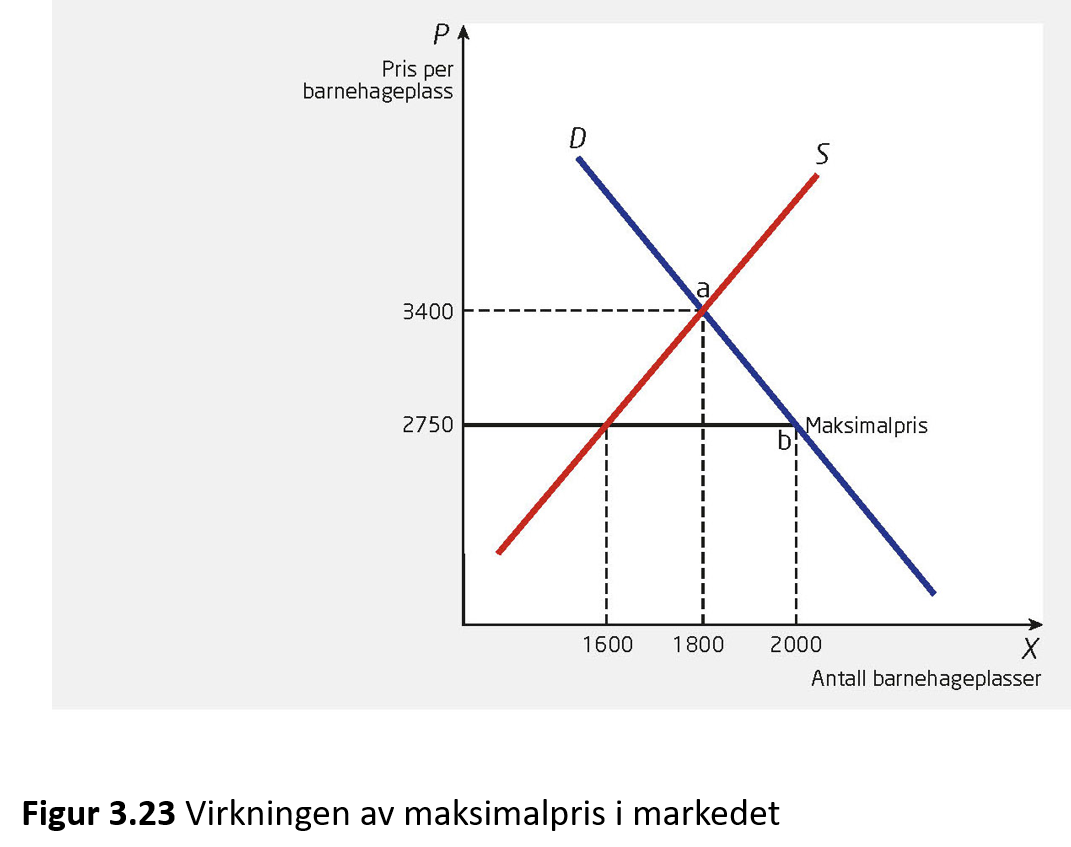

Nylig har Kiwi innført *Prislås* og Rema 1000 har *Prisfrys*. Det ser ut som om kunder ser på disse som [tilbud](https://www.nettavisen.no/okonomi/advarer-viktig-at-folk-ikke-lar-seg-lure-av-prislas/s/5-95-1552515), men de er ingenting annet enn maksimale priser!         
I [rapporten til Afry-Menon](https://uit-sok-1006-v24.github.io/artikler/afry_menon_oed_endelig-rapport.pdf) om strømmarkedet, analyseres en type maksimal pris i sluttbrukermarkedet (s. 55-60). På side 22-25 kan du lese om etterspørselens priselastisitet i strømmmarkedet.         
Her er figuren som vil bli forklart i forelesningen (det er en liten unøyaktighet her):
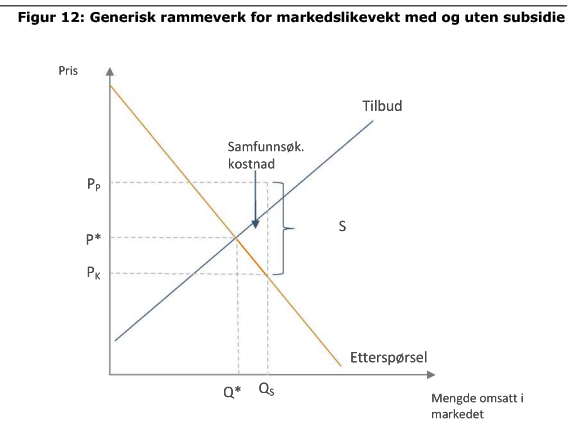

Her kan du lese om [regjeringens strømtiltak for husholdninger](https://www.regjeringen.no/no/tema/energi/regjeringens-stromtiltak/id2900232/?expand=factbox2900261). Dette er en kombinasjon av en maksimal pris og en subsidie:        
*"Fra september 2023 baseres strømstøtten på gjennomsnittlig markedspris (elspotpris) time for time i det lokale prisområdet husholdningen tilhører. Når den overstiger 70 øre per kilowattime (kWh) eksklusive merverdiavgift, vil staten betale 90 prosent av kraftprisen over dette nivået. Lovendringene trådte i kraft 16. juni 2023. Fra og med 1. januar 2024 vil terskelen på 70 øre/kWh endres til 73 øre/kWh".* 

#### Minstepris (prisgulv)
Bruk av minstepriser er noe mindre utbredt i Norge. De brukes for noen fiskeart, hvor minsteprisene er fastsatt av Norges Råfisklag. Begrunnelse for dette finnes i kap. 2.3 i en rapport levert Nærings- og fiskeridepartementet i 2016: [Forenklinger og forbedringer innen førstehåndsomsetningen av fisk](https://www.regjeringen.no/contentassets/2557a67dbb1944a69984936b8f71daef/forenklinger_og_forbedringer_nett.pdf).

Det er også innført minstelønn i enkelte bransjer selv om Norge ikke har en generell minstelønn. Dette er fastsatt gjennom tariffavtaler. Se temaet hos [Arbeidstilsynet](https://www.arbeidstilsynet.no/arbeidsforhold/lonn/minstelonn/).

Analyse av en innføring av minstpris finner man i Fig 3.24 i boka.        
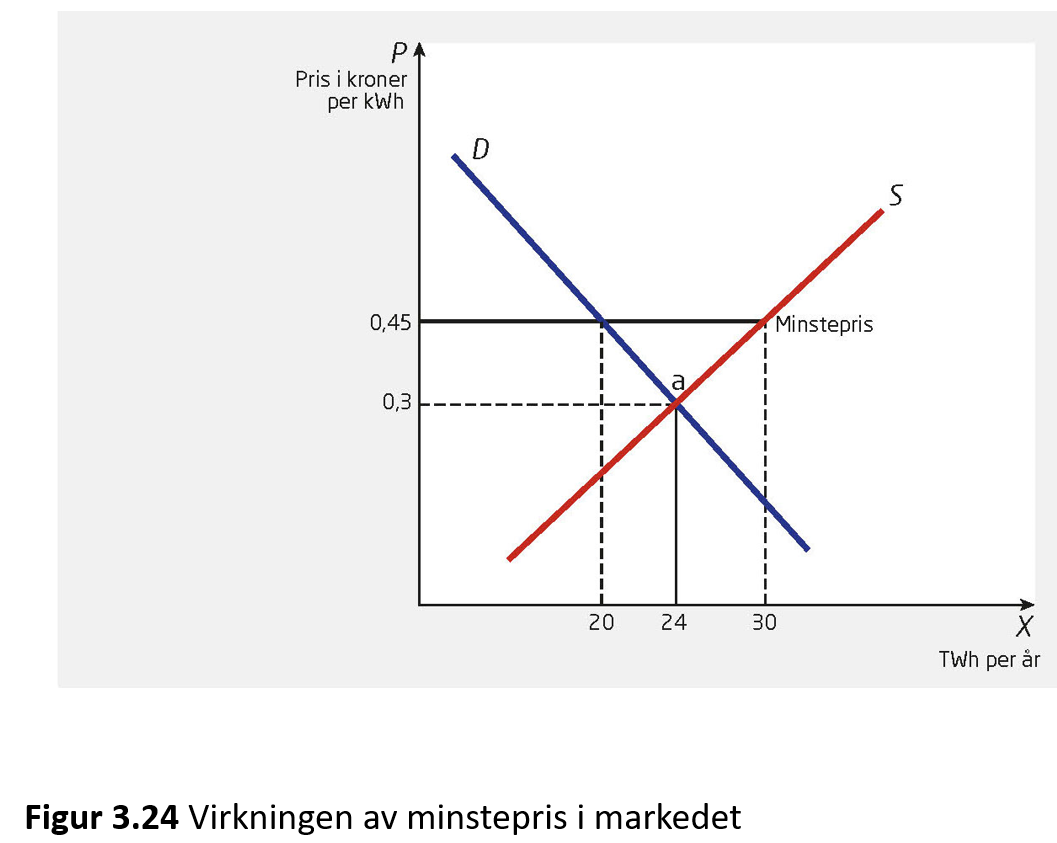
